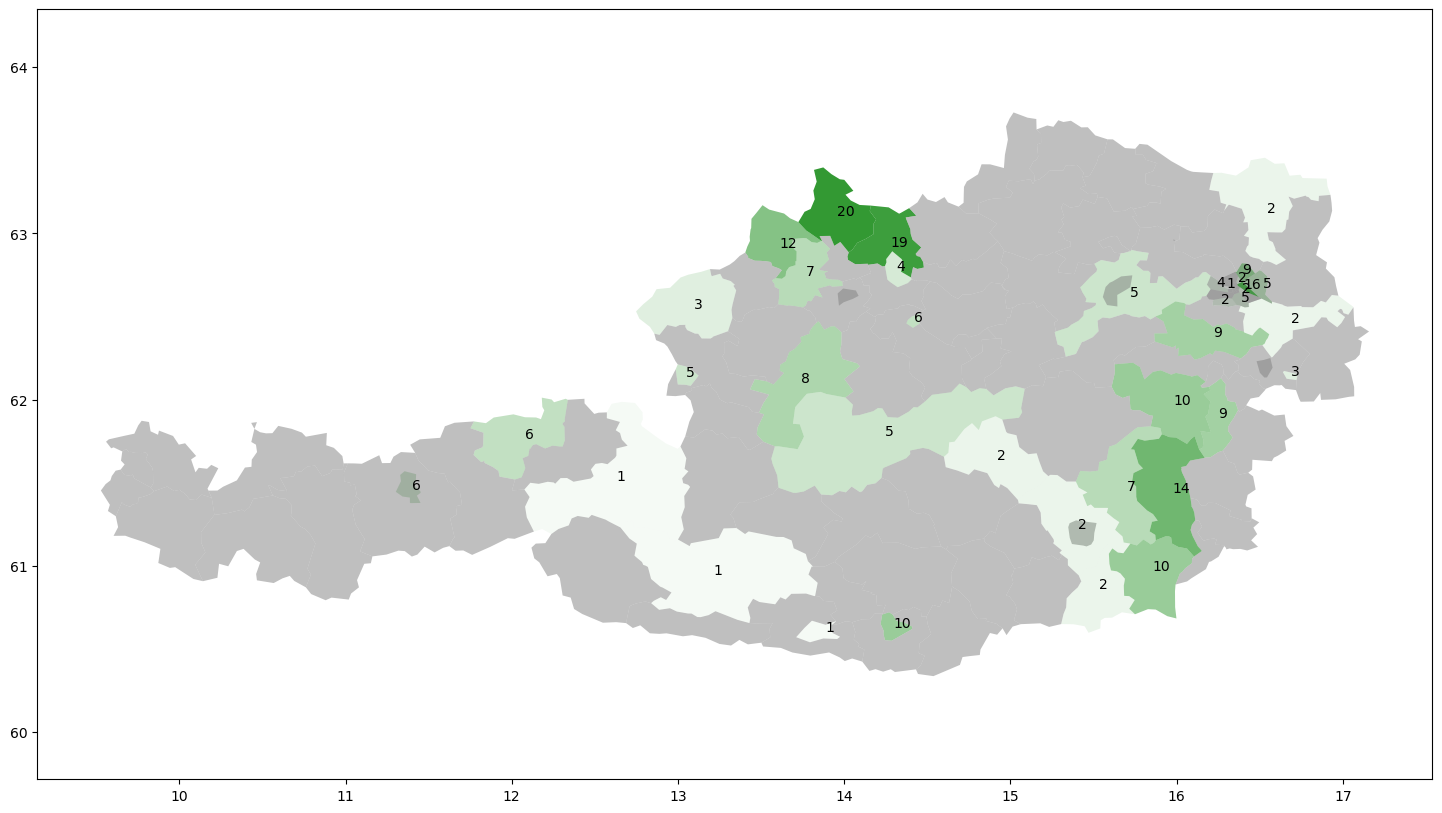

In [2]:
import json
import numpy as np
import os
import matplotlib.pyplot as plt

#Load and read the geojson file for Italys regions. 

#at_url = "https://github.com/ginseng666/GeoJSON-TopoJSON-Austria/blob/81df08cced08b02a873f6375e17424e053a99ac0/2021/simplified-99.9/bezirke_999_geo.json"
#with urllib.request.urlopen(at_url) as url:
        #jdata = json.loads(url.read().decode())
    
#           1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42
s_bricks = [102,201,202,206,303,304,313,315,316,320,321,401,402,404,407,408,413,414,416,501,506,602,606,610,611,612,617,622,623,624,625,701,705,902,903,910,914,916,920,921,922,923]
#          1 2  3 4 5 6 7 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42
s_sales = [3,10,1,1,9,2,2,10,5,9, 1, 4, 6, 3, 8, 7, 20,12,19,5, 1, 8, 2, 2, 2, 5, 7, 14,10,3, 2, 6, 6, 16,2, 5, 4, 1, 2, 9, 5, 2]
s_exclude = []  # prevent double brick lookup
    
# {'type': 'FeatureCollection', 'name': 'bezirke_999_geo', 'crs': 
# {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}}, 'features': 
# [{'type': 'Feature', 'properties': {'iso': '322', 'name': 'Waidhofen an der Thaya'}, 'geometry': 
# {'type': 'MultiPolygon', 'coordinates': [[[[15.235486190707704, 48.75154503502358], [15.218308905888918, 

MY_PATH = r'D:\DL\lrgtxt0'
os.chdir(MY_PATH)
with open('AT0.geojson', 'r', encoding='utf-8') as f:
    jdata = json.load(f)  # iso is the brick number

fig, axs = plt.subplots()
axs.set_aspect('equal', 'datalim')
fig.set_size_inches(18, 10)

pts = []  # list of points defining boundaries of polygons
for  feature in jdata['features']:
    #print(feature['properties']['iso'])  # brick
    if feature['geometry']['type'] == 'Polygon':
        pts.extend(feature['geometry']['coordinates'][0])      
    elif feature['geometry']['type'] == 'MultiPolygon':
        for polyg in feature['geometry']['coordinates']:
            x = [el[0] for el in polyg[0]]
            y = [el[1]*1.3 for el in polyg[0]]  # stretch into y a bit
            if int(feature['properties']['iso']) in s_bricks and not int(feature['properties']['iso']) in s_exclude:
                #print(feature['properties']['iso'], feature['properties']['name'])
                s_exclude.append(int(feature['properties']['iso']))
                if int(s_sales[s_bricks.index(int(feature['properties']['iso']))]) > 0:
                    axs.fill(x, y, "g", alpha=int(s_sales[s_bricks.index(int(feature['properties']['iso']))])/25)
                xt = sum(x) / len(x)  # find center of polygon
                yt = sum(y) / len(y)
                axs.annotate(s_sales[s_bricks.index(int(feature['properties']['iso']))], xy=(xt, yt))
            else:
                axs.fill(x, y, "grey", alpha=0.5)
    elif feature['geometry']['type'] == 'LineString': 
        pts.extend(feature['geometry']['coordinates'])
    else: pass           

plt.show()

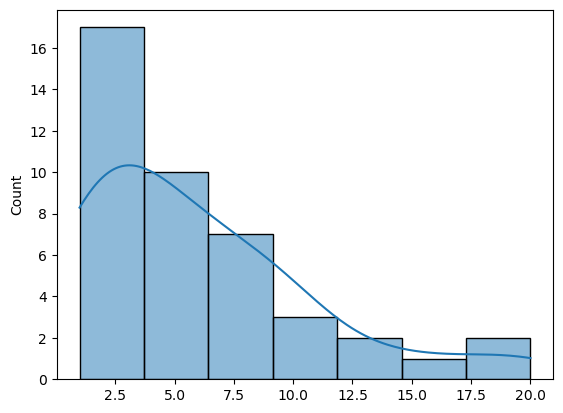

In [3]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
#sns.set(style="darkgrid")
#df = sns.load_dataset("iris")
s_sales = np.array([3,10,1,1,9,2,2,10,5,9, 1, 4, 6, 3, 8, 7, 20,12,19,5, 1, 8, 2, 2, 2, 5, 7, 14,10,3, 2, 6, 6, 16,2, 5, 4, 1, 2, 9, 5, 2])

#sns.histplot(data=s_sales, x="sepal_length", kde=True)
sns.histplot(data=s_sales, kde=True)
plt.show()

In [4]:
class TuringM:
    def __init__(self):
        self.m_config = 'b'
        self.head_pos = 0
    
    def statetrans(self):
        if self.m_config == 'b':
            print(0)
            self.head_pos += 1
            self.m_config = 'c'
        elif self.m_config == 'c':
            self.head_pos += 1
            self.m_config = 'e'
        elif self.m_config == 'e':
            print(1)
            self.head_pos += 1
            self.m_config = 'f'
        else:
            self.head_pos += 1
            self.m_config = 'b'
            
t0 = TuringM()
for i in range(15):
    t0.statetrans()

0
1
0
1
0
1
0
1


In [5]:
import pandas
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


MY_PATH = r'C:\Users\User\Desktop\OptTherme'
os.chdir(MY_PATH)

df = pandas.read_csv(r'UNT330A_20220818_111727.log.csv')
#print(df)
df.plot(x="DateTime", y=["C"])
plt.show()

peaks, _ = find_peaks(df["C"], height=(24, 30), distance = 100)  # height: choose peaks in this range; distance = between points
print(peaks)
print([df["C"][p] for p in peaks])

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\User\\Desktop\\OptTherme'

In [1]:
# Rakki maths II
import random

def sample_div(n=4, m=2):
    a = random.randint(10**(n-1), 10**n)
    b = random.randint(10**(m-1), 10**m) - 1
    b = max(2, b)
    return (a, b, a//b, a % b)

def sample_mult(n=3, m=3):
    a = random.randint(10**(n-1), 10**n)
    b = random.randint(10**(m-1), 10**m)
    return (a, b, a*b)

for i in range(2):
    problem = sample_div()
    print(f"{problem[0]} : {problem[1]} = {problem[2]}, R {problem[3]}")
for i in range(0):
    problem = sample_mult()
    print(f"{problem[0]} * {problem[1]} = {problem[2]}")

8844 : 81 = 109, R 15
9744 : 62 = 157, R 10


In [5]:
# descriptors

class A:
    def f(self):
        pass
    
def functions():
    a = A()
    print(a.f)
    print(A.f)
    
functions()
print(A.__dict__)  # reach into the class dict

<bound method A.f of <__main__.A object at 0x000001F14D16EE30>>
<function A.f at 0x000001F14EBA5990>
{'__module__': '__main__', 'f': <function A.f at 0x000001F14EBA5990>, '__dict__': <attribute '__dict__' of 'A' objects>, '__weakref__': <attribute '__weakref__' of 'A' objects>, '__doc__': None}


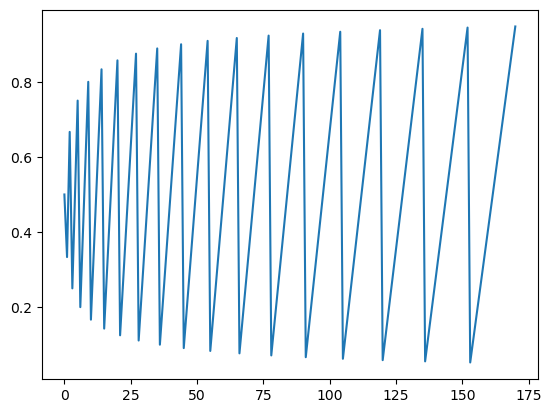

In [2]:

import matplotlib.pyplot as plt

def fracseries():
    res = []
    for n in range(1,20):
        for k in range(1,n):
            res.append(k/n)
    return res

plt.plot(fracseries())
plt.show()

In [13]:

def fracseries1(n):
    return [1/2**(k+1) for k in range(n)]

def fracseries2(n):
    return [k/2**(k+1) for k in range(n)]

def fracseries3(n):
    return [(1/k) - (1/k**2) for k in range(1,n)]

print(sum(fracseries1(1200)) - sum(fracseries2(1200)))
print(sum(fracseries3(100000)))

1.1102230246251565e-16
10.445212063065217


In [16]:

def num_diff(f, x, h):
    return (f(x+h) - f(x)) / h

print(num_diff(lambda x: x**2, 1, 0.1))

2.100000000000002


In [20]:

def const(n):
    return (n,n)

def add(x, y):
    return (x[0]+y[0], x[1]+y[1])

def times(x, y):
    return (x[0]-y[0], x[1]-y[0]+x[0]-y[1])

def a_function(x):
    return add(times(x, x), add(x, const(1)))

a_function([1,1])

(2, 2)

In [12]:
import math

def pqalgo(p,q):
    res = []
    curr_sub = 1
    n = 1
    while p > 1:
        while curr_sub > p/q:
            n += 1
            curr_sub = 1/n
        p = p*n - q
        q *= n
        pqgcd = math.gcd(int(p), int(q))
        if pqgcd > 1:
            p /= pqgcd
            q /= pqgcd
        res.append((p,q))
    return res

pqalgo(7243, 4140)

[(3103, 4140),
 (1033.0, 4140.0),
 (41.0, 828.0),
 (11.0, 5796.0),
 (1.0, 3054492.0)]

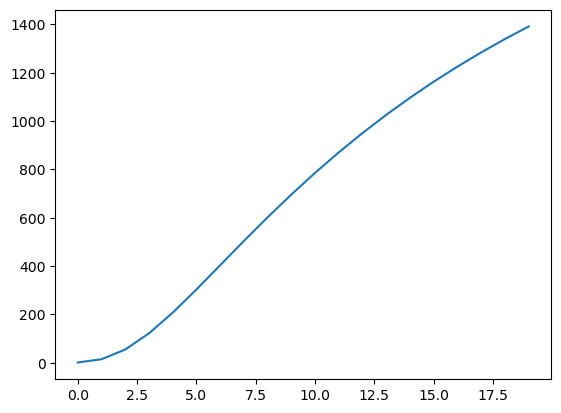

In [8]:
# picturing a scale
import math
import matplotlib.pyplot as plt

plt.plot([math.exp(8/(t+2)*t) for t in range(20)])
plt.show()

In [1]:
import math

def pqalgo(p,q):
    '''composition of fraction p/q as 1/q0 + 1/q1 + ...'''
    res = []
    curr_sub = 1
    n = 1
    while p > 1:
        while curr_sub > p/q:
            n += 1
            curr_sub = 1/n
        p = p*n - q
        q *= n
        pqgcd = math.gcd(int(p), int(q))
        if pqgcd > 1:
            p /= pqgcd
            q /= pqgcd
        res.append((p,q))
    return res

pqalgo(8433, 3744)

[(521.0, 416.0), (105.0, 416.0), (1.0, 416.0)]

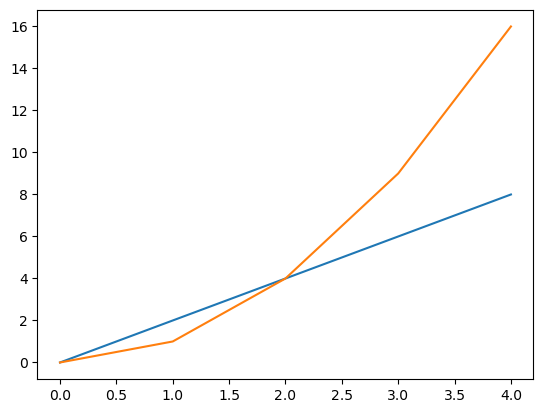

In [1]:
import matplotlib.pyplot as plt

plt.plot([2*r for r in range(5)])
plt.plot([r*r for r in range(5)])
plt.show()

In [4]:
# Rakki maths 1st test
import random

def sample_div(n=3, m=2):
    a = random.randint(10**(n-1), 10**n)
    b = random.randint(10**(m-1), 10**m) - 1
    b = max(2, b)
    return (a, b, a//b, a % b)

def sample_mult(n=3, m=1):
    a = random.randint(10**(n-1), 10**n)
    b = random.randint(10**(m-1), 10**m)
    return (a, b, a*b)

def sample_rect(n=3, m=3):
    a = random.randint(10**(n-1), 10**n)
    b = random.randint(10**(m-1), 10**m)
    c = random.randint(10**(m-2), 10**(m-1))
    return 'Ein rechteckiges Grundstück soll eingezäunt werden. Die Länge ist ' + str(a) + ', die Breite ist ' + str(b) + ', die Einfahrt ' + str(c) + ' Meter. Wie viel Zaun brauche ich?'

def write_number(n=4):
    a = random.randint(10**(n-1), 10**n)
    lttrs = ['T', 'H', 'Z', 'E']
    res = [c + lttrs[i + (len(lttrs)-n)] for i,c in enumerate(str(a))]
    random.shuffle(res)
    return res

def conv_nr(n=2):
    a = random.randint(10**(n-1), 10**n)
    return 'Wie viele mm sind ' + str(a) + 'm?'

for i in range(3):
    problem = sample_div()
    print(f"{problem[0]} : {problem[1]} = {problem[2]}, R {problem[3]}")
for i in range(3):
    problem = sample_mult()
    print(f"{problem[0]} * {problem[1]} = {problem[2]}")
for i in range(3): 
    print(f"{sample_rect()}")
for i in range(3):
    print(f"{write_number()}")
for i in range(3):
    print(f"{conv_nr()}")

245 : 97 = 2, R 51
159 : 96 = 1, R 63
219 : 46 = 4, R 35
555 * 2 = 1110
351 * 10 = 3510
888 * 4 = 3552
Ein rechteckiges Grundstück soll eingezäunt werden. Die Länge ist 635, die Breite ist 558, die Einfahrt 73 Meter. Wie viel Zaun brauche ich?
Ein rechteckiges Grundstück soll eingezäunt werden. Die Länge ist 911, die Breite ist 740, die Einfahrt 95 Meter. Wie viel Zaun brauche ich?
Ein rechteckiges Grundstück soll eingezäunt werden. Die Länge ist 944, die Breite ist 920, die Einfahrt 100 Meter. Wie viel Zaun brauche ich?
['3E', '9H', '4T', '9Z']
['7E', '2T', '6H', '0Z']
['5T', '3H', '6E', '3Z']
Wie viele mm sind 26m?
Wie viele mm sind 81m?
Wie viele mm sind 64m?


In [ ]:
# Arztsuche

# https://www.aerztekammer.at/arztsuche

# NÖ https://www.arztnoe.at/arztsuche/10002
# Wien
# https://www.praxisplan.at/List-new.php?pp_s_id=771&pp_doctype=resident&pp_first=&pp_last=&pp_zip=1130&pp_gender=-1&pp_id_field=-1&pp_id_additional_field=-1&pp_id_special_field=-1&pp_id_kk=-1&pp_o_mo=&pp_morning_afternoon=&pp_from=-1&pp_till=-1&pp_id_lingo=-1&pp_dORb=&ppb_blinde=&ppb_gebaerden=&ppb_parkplatz=&ppb_zugang=&ppb_rampe=&ppb_wc=&ppb_hoehe=&pp_open_now=&page=&page=15&ppb_distance=999
# https://www.praxisplan.at/List-new.php?pp_first=&pp_last=&pp_zip=1130&pp_gender=-1&pp_id_field=-1&pp_id_additional_field=-1&pp_id_special_field=-1&pp_id_kk=-1&pp_o_mo=&pp_morning_afternoon=&pp_from=-1&pp_till=-1&pp_id_lingo=-1&pp_dORb=&ppb_blinde=&ppb_gebaerden=&ppb_parkplatz=&ppb_zugang=&ppb_rampe=&ppb_wc=&ppb_hoehe=&pp_open_now=&page=&page=15&ppb_distance=999
# https://www.praxisplan.at/List-new.php?pp_first=&pp_last=&pp_zip=1130&pp_gender=-1&pp_id_field=-1&pp_id_additional_field=-1&pp_id_special_field=-1&pp_id_kk=-1&pp_o_mo=&pp_morning_afternoon=&pp_from=-1&pp_till=-1&pp_id_lingo=-1&pp_dORb=&ppb_blinde=&ppb_gebaerden=&ppb_parkplatz=&ppb_zugang=&ppb_rampe=&ppb_wc=&ppb_hoehe=&pp_open_now=&page=&page=1&ppb_distance=999

# https://www.praxisplan.at/List-new.php?pp_first=&pp_last=&pp_zip=1130&pp_gender=-1&pp_id_field=-1&pp_id_additional_field=-1&pp_id_special_field=-1&pp_id_kk=-1&pp_o_mo=&pp_morning_afternoon=&pp_from=-1&pp_till=-1&pp_id_lingo=-1&pp_dORb=&ppb_blinde=&ppb_gebaerden=&ppb_parkplatz=&ppb_zugang=&ppb_rampe=&ppb_wc=&ppb_hoehe=&pp_open_now=&page=&page=&page=&ppb_distance=999
# https://www.praxisplan.at/List-new.php?pp_first=&pp_last=&pp_zip=1130&pp_gender=-1&pp_id_field=-1&pp_id_additional_field=-1&pp_id_special_field=-1&pp_id_kk=-1&pp_o_mo=&pp_morning_afternoon=&pp_from=-1&pp_till=-1&pp_id_lingo=-1&pp_dORb=&ppb_blinde=&ppb_gebaerden=&ppb_parkplatz=&ppb_zugang=&ppb_rampe=&ppb_wc=&ppb_hoehe=&pp_open_now=&page=&page=15&ppb_distance=999

<span class="ContentBox" style="line-height:1.5em;">                                                                        
<b><a class="td-links-green" href="1874741406/301/Christian-Othmar-Johannes-Aiginger/1" title="Detailansicht"><font color="#333">Aiginger Christian Othmar Johannes  Dr. </font></a></b><br/>
<img alt="" src="/WEFiles/Image/WEImage/aek_PP_Icons_16x16_Standort.svg" width="16px"/>
		0 km, 
		Auhofstraße 118/3, A-1130, Tel +43-660-5291324<br/>
<span style="color:#e30513;"></span>
<hr style="border: 0.7px solid #ccc;"/>

# Ktn https://www.aekktn.at/arztsuche?vorname=&nachname=&geschlecht=*&ordinationszeiten=0&ordinationszeit_1_type=0&ordinationszeit_1_time1=000&ordinationszeit_1_time2=100&ordinationszeit_2_type=0&ordinationszeit_2_time1=000&ordinationszeit_2_time2=100&ordinationszeit_3_type=0&ordinationszeit_3_time1=000&ordinationszeit_3_time2=100&ordinationszeit_4_type=0&ordinationszeit_4_time1=000&ordinationszeit_4_time2=100&ordinationszeit_5_type=0&ordinationszeit_5_time1=000&ordinationszeit_5_time2=100&ordinationszeit_6_type=0&ordinationszeit_6_time1=000&ordinationszeit_6_time2=100&ordinationszeit_7_type=0&ordinationszeit_7_time1=000&ordinationszeit_7_time2=100&vorsorgeuntersuchung=0&covid_impfungen=&sort=0&suchen=Suche+starten
# OÖ, Sbg, BL https://arztsuche.aeksbg.at/finder/search/land/SA,OO,BL
# Stmk https://www.aekstmk.or.at/cms/cms.php?spam=634fdbfa33b88&referer=%2Fcms%2Fcms.php%3FpageName%3D46&search=search&pageName=46&fachgruppe=0&bezirk=0&arztname=&kassa=0&diplom=0&zusfach=0&spezialisierung=0&geschlecht=&sprache=0&vis=15
# T https://www.aektirol.at/arztsuche -> aber Liste druckbar!!
# Vbg https://www.medicus-online.at/aek/dist/medicus.html#ergebnisfeld_inhalt

# Österr. Ärzteliste https://www.aerzteliste-online.at/home?p_p_id=com_ableneo_oak_aelon_AelonPortlet&p_p_lifecycle=1&p_p_state=normal&p_p_mode=view&_com_ableneo_oak_aelon_AelonPortlet_javax.portlet.action=doStartFlowCommand&_com_ableneo_oak_aelon_AelonPortlet_mvcRenderCommandName=renderSearch&p_auth=K15GxYQj
# https://www.aerzteliste-online.at/home?p_p_id=com_ableneo_oak_aelon_AelonPortlet&p_p_lifecycle=1&p_p_state=normal&p_p_mode=view&_com_ableneo_oak_aelon_AelonPortlet_javax.portlet.action=doSearchCommand&_com_ableneo_oak_aelon_AelonPortlet_mvcRenderCommandName=renderResults
# https://www.aerzteliste-online.at/home?p_p_id=com_ableneo_oak_aelon_AelonPortlet&p_p_lifecycle=0&p_p_state=normal&p_p_mode=view&_com_ableneo_oak_aelon_AelonPortlet_mvcRenderCommandName=renderDetail&_com_ableneo_oak_aelon_AelonPortlet_LID=596



In [14]:
# HCPs webscraping
import requests
import sys
import os
import webbrowser
import bs4
import time
import random
import json
from collections import namedtuple
import csv
import re

def getres(url): # get request http://docs.python-requests.org/en/master/user/quickstart/
    try:
        return requests.get(url, timeout=10.0)
    except Exception as e:
        msg = "Exception is:\n %s \n" % e
        print(msg)
        resf = namedtuple('res', 'content status_code')
        pt1 = resf('', 204)
        return resf # return a failed request

def __unicode__(self):
    return unicode(self.some_field) or u''
    
def main():
    '''read hcp directory'''
    
    ddataline = namedtuple('ddataline', 'dist address zipc tel')
    
    class ddataline:
        dist = ''
        address = ''
        zipc = ''
        tel = ''
        
        def __init__(self, vlst):
            self.dist = vlst[0]
            self.address = vlst[1]
            self.zipc = vlst[2]
            if len(vlst) > 3:
                self.tel = vlst[3]
        def get_vals(self):
            return [self.address, self.zipc, self.tel]  # deliberately omitting dist (not used)
                    
    outtext = ''
    #zipcodes = ['1010', '1020', '1030', '1040', '1050', '1060', '1070', '1080', '1090', '1100','1110', '1120', '1130', '1140', '1150', '1160', '1170', '1180', '1190', '1200', '1210', '1220', '1230']
    zipcodes = ['1010']
    print(time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(time.time())), 'requesting data from site...')    
        
    results = []
    hcp_names = {}
    hcp_details = {}
    
    for current_zip in zipcodes:
        for pgctr in range(3):  # change number of pages here !
            if pgctr == 0:
                res = getres('https://www.praxisplan.at/List-new.php?pp_first=&pp_last=&pp_zip=' + current_zip + '&pp_gender=-1&pp_id_field=-1&pp_id_additional_field=-1&pp_id_special_field=-1&pp_id_kk=-1&pp_o_mo=&pp_morning_afternoon=&pp_from=-1&pp_till=-1&pp_id_lingo=-1&pp_dORb=&ppb_blinde=&ppb_gebaerden=&ppb_parkplatz=&ppb_zugang=&ppb_rampe=&ppb_wc=&ppb_hoehe=&pp_open_now=&page=&page=1&ppb_distance=999')
            else:
                res = getres('https://www.praxisplan.at/List-new.php?pp_first=&pp_last=&pp_zip=' + current_zip + '&pp_gender=-1&pp_id_field=-1&pp_id_additional_field=-1&pp_id_special_field=-1&pp_id_kk=-1&pp_o_mo=&pp_morning_afternoon=&pp_from=-1&pp_till=-1&pp_id_lingo=-1&pp_dORb=&ppb_blinde=&ppb_gebaerden=&ppb_parkplatz=&ppb_zugang=&ppb_rampe=&ppb_wc=&ppb_hoehe=&pp_open_now=&page=&page=' + str((pgctr+1)*15) + '&ppb_distance=999')
            if res.status_code == 200:
                print(time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(time.time())), 'processing page...')
                exsoup = bs4.BeautifulSoup(res.text, 'html.parser')
                elems = exsoup.find_all('font')
                if elems is not None:
                    #print('******************', elems)
                    for idx, elem in enumerate(elems):
                        #print('+++++++++++++ IDX: ', idx, elem.text)
                        hcp_names[current_zip + str(pgctr) + str(idx)] = elem.text
                elems = exsoup.find_all('img', width="16px")
                if elems is not None:
                    for idx, elem in enumerate(elems):
                        #print('******* IDX: ', idx, elem.next_element)
                        this_detail = re.sub('\n\t\t', '', elem.next_element)
                        # '101000': '0 km, Volksgartenstraße 3/Top2, A-1010, Tel +43-676-7438445'
                        hcp_details[current_zip + str(pgctr) + str(idx)] = ddataline(this_detail.split(','))

            time.sleep(random.randint(1, 2)) # wait a few seconds

    # '1230214': 'Geidl Lorenz  Dr. '} {'101000': ['0 km', ' Volksgartenstraße 3/Top2', ' A-1010', ' Tel +43-676-7438445']    
    res = {}
    for this_hcp_key in hcp_names:
        res[this_hcp_key] = (hcp_names[this_hcp_key], hcp_details[this_hcp_key].get_vals())
    
    print(time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(time.time())), 'saving files...')
    os.chdir(r'D:\DL\lrgtxt0')
    with open('hcpdata.csv', 'w', newline='') as csvfile:
        #csvwrtr = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
        csvwrtr = csv.writer(csvfile, delimiter=',')
        for row in res:
            csvwrtr.writerow(row)
    
    print(time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(time.time())), 'completed!')
    
if __name__=="__main__":
    main()

Sun, 23 Oct 2022 13:52:08 requesting data from site...
Sun, 23 Oct 2022 13:52:08 processing page...
Sun, 23 Oct 2022 13:52:09 processing page...
Sun, 23 Oct 2022 13:52:10 processing page...
Sun, 23 Oct 2022 13:52:11 saving files...
Sun, 23 Oct 2022 13:52:11 completed!


In [1]:
import numpy as np

x = np.arange(0.0,5.0,1.0)
np.savetxt('test.out', x, delimiter=',')   # X is an array

In [2]:
np.max(np.loadtxt('test.out', delimiter=","))

4.0

In [11]:
import math
#3456/128
#3456/12/32
def prime_factors(n):
    i = 2
    factors = []
    while i * i <= n:
        if n % i:
            i += 1
        else:
            n //= i
            factors.append(i)
    if n > 1:
        factors.append(n)
    return factors

print(prime_factors(3456), 2**7*3**3)

[2, 2, 2, 2, 2, 2, 2, 3, 3, 3] 3456


In [1]:
from collections import namedtuple

ddataline = namedtuple('ddataline', 'name address zipc tel')

class ddataline:
    name = ''
    address = ''
    zipc = ''
    tel = ''

    def __init__(self):
        self.name = ''
        self.address = ''
        self.zipc = ''
        self.tel = ''
    def get_vals(self):
        return [self.name, self.address, self.zipc, self.tel]
        
dtln = ddataline()
dtln.name = 'Bob'
dtln.tel = '2342423423234'
print(dtln.get_vals())

['Bob', '', '', '2342423423234']


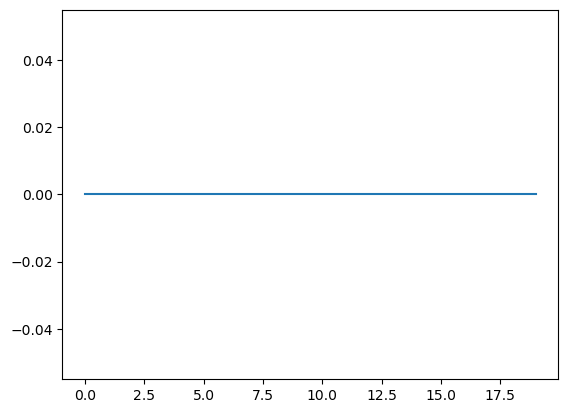

In [11]:
# Weissman score
import math
import matplotlib.pyplot as plt

def weissman(a, r, r_ref, t, t_ref):
    return a * r / r_ref * math.log(t_ref) / math.log(t)

#print(weissman(1, 0.5, 0.8, 0.2, 1))
plt.plot([weissman(1, r/10, 0.5, 0.9, 1) for r in range(20)])
plt.show()